In [1]:
import os

AVOCADOS_PATH = os.path.join("datasets", "avocados")

In [2]:
import pandas as pd

def load_avocados_data(avocados_path=AVOCADOS_PATH):
    csv_path = os.path.join(avocados_path, "avocado.csv")
    return pd.read_csv(csv_path)

In [3]:
avocados = load_avocados_data()
avocados.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
avocados["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [6]:
avocados["region"].value_counts()

SouthCentral           338
RaleighGreensboro      338
StLouis                338
SanDiego               338
Boise                  338
BaltimoreWashington    338
TotalUS                338
Sacramento             338
Houston                338
LasVegas               338
Syracuse               338
BuffaloRochester       338
PhoenixTucson          338
Plains                 338
West                   338
Orlando                338
Atlanta                338
Indianapolis           338
Columbus               338
Detroit                338
Charlotte              338
Midsouth               338
Jacksonville           338
NewOrleansMobile       338
HarrisburgScranton     338
Chicago                338
Southeast              338
Albany                 338
NorthernNewEngland     338
HartfordSpringfield    338
Pittsburgh             338
Louisville             338
Philadelphia           338
Roanoke                338
Boston                 338
Northeast              338
Tampa                  338
S

In [7]:
avocados.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

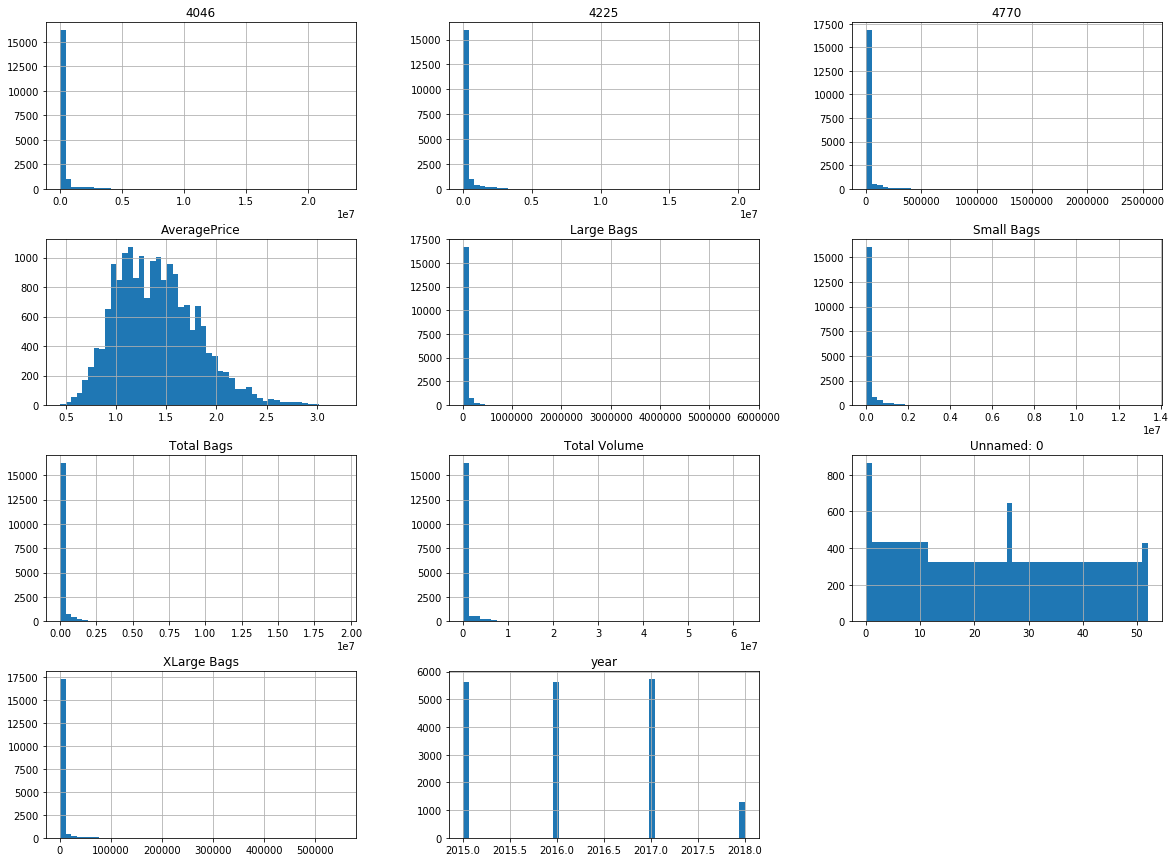

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
avocados.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
#will change evertime it is ran
#eventually showing the model the entire dataset

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
avocados_with_id = avocados.reset_index() # adds an 'index column'
train_set, test_set = split_train_test_by_id(avocados_with_id, 0.2, "index")

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(avocados, test_size=0.2, random_state=42)

In [13]:
#Checking if the sets were split evenly
train_set["type"].value_counts()

conventional    7306
organic         7293
Name: type, dtype: int64

In [14]:
test_set["type"].value_counts()

organic         1830
conventional    1820
Name: type, dtype: int64

In [15]:
corr_matrix = avocados.corr()

In [16]:
corr_matrix["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
year            0.093197
XLarge Bags    -0.117592
Unnamed: 0     -0.133008
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["AveragePrice", "4046", "Total Volume", "4770"]
scatter_matrix(avocados[attributes], figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0031e2c208>,
      dtype=object)

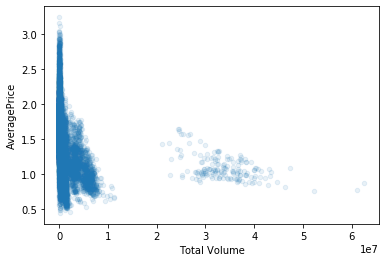

In [18]:
avocados.plot(kind="scatter", x="Total Volume", y="AveragePrice",
             alpha=0.1)

In [19]:
avocados["volume_per_bag"] = avocados["Total Volume"]/avocados["Total Bags"]
avocados["4046_ratio"] = avocados["4046"]/avocados["Total Volume"]
avocados["4225_ratio"] = avocados["4225"]/avocados["Total Volume"]
avocados["4770_ratio"] = avocados["4770"]/avocados["Total Volume"]

In [20]:
avocados.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  volume_per_bag    4046_ratio    4225_ratio    4770_ratio  
count  18249.000000    1.824900e+04  18249.000000  18249.000000  18249.000000  
mean    2016.147899             inf      0.225185      0.347391      0.019313  
std        0.939938             NaN      0.213921      0.234912      0.041866  
min     2015.000000    1.001824e+00      0.000000      0.000000      0.000000  
25%     2015.000000    1.788166e+00      0.032779      0.157279      0.000000  
50%     2016.000000    2.832644e+00      0.157837      0.316862      0.001516  
75%     2017.000000    4.368265e+00      0.378737      0.517175      0.019184  
max     2018.000000             inf      0.972523      0.992628      0.448719

In [21]:
corr_matrix = avocados.corr()
corr_matrix["AveragePrice"].sort_values(ascending=False)

AveragePrice      1.000000
4225_ratio        0.156095
year              0.093197
volume_per_bag    0.043009
XLarge Bags      -0.117592
4770_ratio       -0.126823
Unnamed: 0       -0.133008
4225             -0.172928
Large Bags       -0.172940
Small Bags       -0.174730
Total Bags       -0.177088
4770             -0.179446
Total Volume     -0.192752
4046             -0.208317
4046_ratio       -0.341860
Name: AveragePrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00570d6cc0>,
      dtype=object)

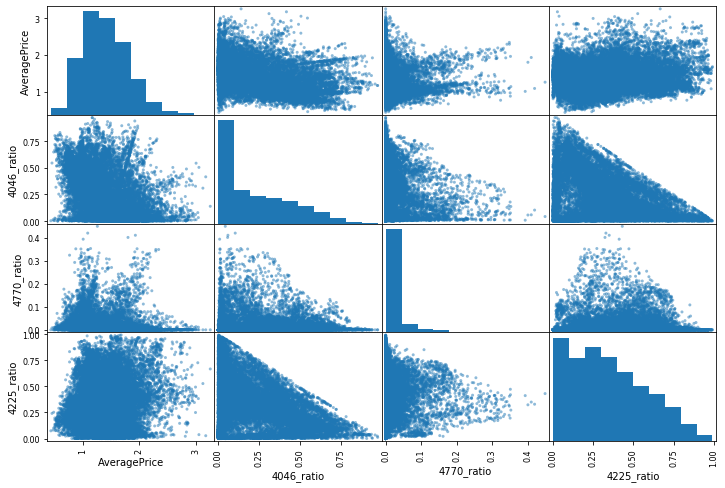

In [22]:
attributes = ["AveragePrice", "4046_ratio", "4770_ratio", "4225_ratio"]
scatter_matrix(avocados[attributes], figsize=(12,8))

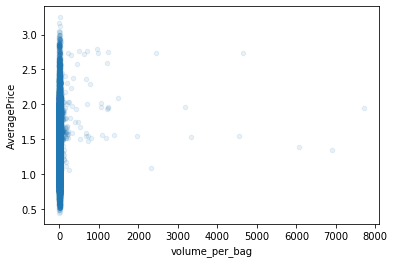

In [23]:
avocados.plot(kind="scatter", x="volume_per_bag", y="AveragePrice",
             alpha=0.1)

In [24]:
avocados["volume_per_bag"].max()

inf

In [25]:
avocados.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  volume_per_bag    4046_ratio    4225_ratio    4770_ratio  
count  18249.000000    1.824900e+04  18249.000000  18249.000000  18249.000000  
mean    2016.147899             inf      0.225185      0.347391      0.019313  
std        0.939938             NaN      0.213921      0.234912      0.041866  
min     2015.000000    1.001824e+00      0.000000      0.000000      0.000000  
25%     2015.000000    1.788166e+00      0.032779      0.157279      0.000000  
50%     2016.000000    2.832644e+00      0.157837      0.316862      0.001516  
75%     2017.000000    4.368265e+00      0.378737      0.517175      0.019184  
max     2018.000000             inf      0.972523      0.992628      0.448719

In [26]:
avocados["Total Bags"].count()

18249

In [27]:
avocados["Total Volume"].max()

62505646.52

In [28]:
###fixing Total Bags having 0 for a value
def indexes_for_value(data, value):
    indexes = []
    for i in range(len(data)):
        if data[i]==value:
            indexes.append(i)
    return indexes
            
def replaceValueMean(data, value):
    indexes = indexes_for_value(data,value)
    total=0
    count=len(data)-len(indexes)
    for i in range(len(data)):
        if data[i]!=value:
            total+=data[i]
    mean=total/count
    for i in indexes:
        data[i] = mean
    return data
            

In [29]:
indexes_for_value(avocados["Total Bags"], 0)

[9212,
 11024,
 11320,
 11321,
 11333,
 11347,
 11348,
 11387,
 11388,
 11594,
 11595,
 11596,
 11597,
 11614,
 11662]

In [30]:
replaceValueMean(avocados["Total Bags"], 0)

/home/porterg2003/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0         8696.87
1         9505.56
2         8145.35
3         5811.16
4         6183.95
           ...   
18244    13498.67
18245     9264.84
18246     9394.11
18247    10969.54
18248    12014.15
Name: Total Bags, Length: 18249, dtype: float64

In [31]:
avocados["volume_per_bag"] = avocados["Total Volume"]/avocados["Total Bags"]

In [32]:
avocados.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.398363e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862184e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  3.090000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.108010e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.992521e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.112384e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  volume_per_bag    4046_ratio    4225_ratio    4770_ratio  
count  18249.000000    18249.000000  18249.000000  18249.000000  18249.000000  
mean    2016.147899        8.406657      0.225185      0.347391      0.019313  
std        0.939938      116.793082      0.213921      0.234912      0.041866  
min     2015.000000        0.011618      0.000000      0.000000      0.000000  
25%     2015.000000        1.784211      0.032779      0.157279      0.000000  
50%     2016.000000        2.828519      0.157837      0.316862      0.001516  
75%     2017.000000        4.361341      0.378737      0.517175      0.019184  
max     2018.000000     7708.260450      0.972523      0.992628      0.448719

In [33]:
train_set, test_set = train_test_split(avocados, test_size=0.2, random_state=42)
avocados = train_set.copy()

In [34]:
avocados_labels = train_set["AveragePrice"].copy()
avocados = train_set.drop("AveragePrice", axis=1)

In [35]:
#substitute for missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [36]:
avocados = avocados.drop("Unnamed: 0", axis=1)

In [37]:
avocados.describe()

Total Volume          4046          4225          4770    Total Bags  \
count  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04   
mean   8.486369e+05  2.934236e+05  2.943944e+05  2.277926e+04  2.382348e+05   
std    3.404709e+06  1.243118e+06  1.195564e+06  1.076246e+05  9.670298e+05   
min    8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00  3.090000e+00   
25%    1.086533e+04  8.547250e+02  2.997545e+03  0.000000e+00  5.160235e+03   
50%    1.091119e+05  8.762480e+03  2.971125e+04  1.905800e+02  4.041798e+04   
75%    4.354375e+05  1.113795e+05  1.507282e+05  6.231185e+03  1.121544e+05   
max    5.228870e+07  1.778761e+07  2.047057e+07  2.546439e+06  1.639452e+07   

         Small Bags    Large Bags    XLarge Bags          year  \
count  1.459900e+04  1.459900e+04   14599.000000  14599.000000   
mean   1.808815e+05  5.403939e+04    3116.713649   2016.148777   
std    7.305218e+05  2.401997e+05   17607.337329      0.940367   
min    0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    2.884600e+03  1.236350e+02       0.000000   2015.000000   
50%    2.655889e+04  2.693840e+03       0.000000   2016.000000   
75%    8.370342e+04  2.242839e+04     133.925000   2017.000000   
max    1.254033e+07  4.324231e+06  551693.650000   2018.000000   

       volume_per_bag    4046_ratio    4225_ratio    4770_ratio  
count    14599.000000  14599.000000  14599.000000  14599.000000  
mean         8.733382      0.225752      0.345798      0.019209  
std        127.947791      0.214598      0.234828      0.041561  
min          0.011618      0.000000      0.000000      0.000000  
25%          1.772124      0.032368      0.156055      0.000000  
50%          2.825934      0.158194      0.313863      0.001578  
75%          4.358727      0.379883      0.514511      0.019113  
max       7708.260450      0.972523      0.992628      0.448719

In [38]:
avocados_num = avocados.drop(["Date", "type", "year", "region"], axis=1)

In [39]:
imputer.fit(avocados_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [40]:
imputer.statistics_

array([1.09111930e+05, 8.76248000e+03, 2.97112500e+04, 1.90580000e+02,
       4.04179800e+04, 2.65588900e+04, 2.69384000e+03, 0.00000000e+00,
       2.82593365e+00, 1.58193823e-01, 3.13863273e-01, 1.57822821e-03])

In [41]:
avocados_num.median().values

array([1.09111930e+05, 8.76248000e+03, 2.97112500e+04, 1.90580000e+02,
       4.04179800e+04, 2.65588900e+04, 2.69384000e+03, 0.00000000e+00,
       2.82593365e+00, 1.58193823e-01, 3.13863273e-01, 1.57822821e-03])

In [42]:
X = imputer.transform(avocados_num)

In [43]:
avocados_tr = pd.DataFrame(X, columns=avocados_num.columns)

In [44]:
def toMonth(dates):
    Month= []
    for date in dates:
        Month.append(int(date[5:7]))
    return pd.DataFrame(Month, columns=["Month"])

In [45]:
avocados["Month"]=toMonth(avocados["Date"])

In [46]:
avocados.describe()

Total Volume          4046          4225          4770    Total Bags  \
count  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04   
mean   8.486369e+05  2.934236e+05  2.943944e+05  2.277926e+04  2.382348e+05   
std    3.404709e+06  1.243118e+06  1.195564e+06  1.076246e+05  9.670298e+05   
min    8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00  3.090000e+00   
25%    1.086533e+04  8.547250e+02  2.997545e+03  0.000000e+00  5.160235e+03   
50%    1.091119e+05  8.762480e+03  2.971125e+04  1.905800e+02  4.041798e+04   
75%    4.354375e+05  1.113795e+05  1.507282e+05  6.231185e+03  1.121544e+05   
max    5.228870e+07  1.778761e+07  2.047057e+07  2.546439e+06  1.639452e+07   

         Small Bags    Large Bags    XLarge Bags          year  \
count  1.459900e+04  1.459900e+04   14599.000000  14599.000000   
mean   1.808815e+05  5.403939e+04    3116.713649   2016.148777   
std    7.305218e+05  2.401997e+05   17607.337329      0.940367   
min    0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    2.884600e+03  1.236350e+02       0.000000   2015.000000   
50%    2.655889e+04  2.693840e+03       0.000000   2016.000000   
75%    8.370342e+04  2.242839e+04     133.925000   2017.000000   
max    1.254033e+07  4.324231e+06  551693.650000   2018.000000   

       volume_per_bag    4046_ratio    4225_ratio    4770_ratio         Month  
count    14599.000000  14599.000000  14599.000000  14599.000000  11652.000000  
mean         8.733382      0.225752      0.345798      0.019209      6.217216  
std        127.947791      0.214598      0.234828      0.041561      3.540092  
min          0.011618      0.000000      0.000000      0.000000      1.000000  
25%          1.772124      0.032368      0.156055      0.000000      3.000000  
50%          2.825934      0.158194      0.313863      0.001578      6.000000  
75%          4.358727      0.379883      0.514511      0.019113      9.000000  
max       7708.260450      0.972523      0.992628      0.448719     12.000000

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
#sparse=False to make it a dense Matrix
type_encoder = OneHotEncoder()
avocados_type_reshaped = avocados["type"].values.reshape(-1,1)
avocados_type_1hot = type_encoder.fit_transform(avocados_type_reshaped)
avocados_type_1hot

<14599x2 sparse matrix of type '<class 'numpy.float64'>'
	with 14599 stored elements in Compressed Sparse Row format>

In [49]:
type_encoder.categories_

[array(['conventional', 'organic'], dtype=object)]

In [50]:
region_encoder = OneHotEncoder()
avocados_region_reshaped = avocados["region"].values.reshape(-1,1)
avocados_region_1hot = region_encoder.fit_transform(avocados_region_reshaped)
avocados_region_1hot

<14599x54 sparse matrix of type '<class 'numpy.float64'>'
	with 14599 stored elements in Compressed Sparse Row format>

In [51]:
region_encoder.categories_

[array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
        'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
        'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
        'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
        'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
        'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
        'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
        'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
        'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
        'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
        'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
        'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
        'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)]

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

#indexes
volume_ix, ix_4046, ix_4225, ix_4770, bags_ix = 1, 2, 3, 4, 5

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_volume_per_bag = True):
        self.add_volume_per_bag = add_volume_per_bag
    def fit(self, X, y=None):
        return self #nothing else to do
    def transform(self, X, y=None):
        ratio_4046 = X[:, ix_4046] / X[:, volume_ix]
        ratio_4225 = X[:, ix_4225] / X[:, volume_ix]
        ratio_4770 = X[:, ix_4770] / X[:, volume_ix]
        if self.add_volume_per_bag:
            volume_per_bag = X[:, volume_ix] / replaceValueMean(X[:, bags_ix], 0)
            return np.c_[X,ratio_4046, ratio_4225, ratio_4770, volume_per_bag]
        else:
            return np.c_[X,ratio_4046, ratio_4225, ratio_4770]
        
attr_adder = CombinedAttributesAdder(add_volume_per_bag=False)
avocados_extra_attribs = attr_adder.transform(avocados.values)

In [53]:
avocados_num.describe()

Total Volume          4046          4225          4770    Total Bags  \
count  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04   
mean   8.486369e+05  2.934236e+05  2.943944e+05  2.277926e+04  2.382348e+05   
std    3.404709e+06  1.243118e+06  1.195564e+06  1.076246e+05  9.670298e+05   
min    8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00  3.090000e+00   
25%    1.086533e+04  8.547250e+02  2.997545e+03  0.000000e+00  5.160235e+03   
50%    1.091119e+05  8.762480e+03  2.971125e+04  1.905800e+02  4.041798e+04   
75%    4.354375e+05  1.113795e+05  1.507282e+05  6.231185e+03  1.121544e+05   
max    5.228870e+07  1.778761e+07  2.047057e+07  2.546439e+06  1.639452e+07   

         Small Bags    Large Bags    XLarge Bags  volume_per_bag  \
count  1.459900e+04  1.459900e+04   14599.000000    14599.000000   
mean   1.808815e+05  5.403939e+04    3116.713649        8.733382   
std    7.305218e+05  2.401997e+05   17607.337329      127.947791   
min    0.000000e+00  0.000000e+00       0.000000        0.011618   
25%    2.884600e+03  1.236350e+02       0.000000        1.772124   
50%    2.655889e+04  2.693840e+03       0.000000        2.825934   
75%    8.370342e+04  2.242839e+04     133.925000        4.358727   
max    1.254033e+07  4.324231e+06  551693.650000     7708.260450   

         4046_ratio    4225_ratio    4770_ratio  
count  14599.000000  14599.000000  14599.000000  
mean       0.225752      0.345798      0.019209  
std        0.214598      0.234828      0.041561  
min        0.000000      0.000000      0.000000  
25%        0.032368      0.156055      0.000000  
50%        0.158194      0.313863      0.001578  
75%        0.379883      0.514511      0.019113  
max        0.972523      0.992628      0.448719

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
    ('attribs_adder', CombinedAttributesAdder()),
])

avocados_num_tr = num_pipeline.fit_transform(avocados_num)

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [56]:
num_attribs = list(avocados_num)
cat_attribs = ["type", "region"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler0', StandardScaler()),
    ('attribs_adder', CombinedAttributesAdder(add_volume_per_bag=False)),
    ('std_scaler1', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder()),
])

In [57]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [58]:
avocados_prepared = full_pipeline.fit_transform(avocados)

In [59]:
avocados_prepared

<14599x71 sparse matrix of type '<class 'numpy.float64'>'
	with 248183 stored elements in Compressed Sparse Row format>

In [60]:
avocados_prepared.shape

(14599, 71)

In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(avocados_prepared, avocados_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
some_data = avocados.iloc[:5]
some_labels = avocados_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [1.72196891 1.08580474 1.51202689 0.9973076  1.87637844]
Labels: [1.88, 0.81, 2.01, 1.02, 1.53]


In [63]:
from sklearn.metrics import mean_squared_error
avocados_predictions = lin_reg.predict(avocados_prepared)
lin_mse = mean_squared_error(avocados_labels, avocados_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.2650199722094965

In [64]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(avocados_prepared, avocados_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [65]:
avocados_predictions = tree_reg.predict(avocados_prepared)
tree_mse = mean_squared_error(avocados_labels, avocados_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.3283784410182478e-17

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, avocados_prepared, avocados_labels,
                        scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [67]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [68]:
display_scores(tree_rmse_scores)

Scores: [0.24506317 0.23881815 0.22941871 0.2525058  0.23894259 0.22975374
 0.23616514 0.24171023 0.24157843 0.25017595]
Mean: 0.24041319112472773
Standard deviation: 0.007235055407624375


In [69]:
lin_scores = cross_val_score(lin_reg, avocados_prepared, avocados_labels,
                        scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [70]:
display_scores(lin_rmse_scores)

Scores: [0.24506317 0.23881815 0.22941871 0.2525058  0.23894259 0.22975374
 0.23616514 0.24171023 0.24157843 0.25017595]
Mean: 0.24041319112472773
Standard deviation: 0.007235055407624375


In [71]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(avocados_prepared, avocados_labels)

/home/porterg2003/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [72]:
avocados_predictions = forest_reg.predict(avocados_prepared)
forest_mse = mean_squared_error(avocados_labels, avocados_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.07530326885439664

In [73]:
forest_scores = cross_val_score(forest_reg, avocados_prepared, avocados_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.16879096 0.17853589 0.1795093  0.17953035 0.18135038 0.17291171
 0.18217073 0.1871813  0.18575176 0.18771459]
Mean: 0.18034469691631572
Standard deviation: 0.0057271945749929115


In [74]:
from sklearn.svm import SVR
SVR_reg = SVR()
SVR_reg.fit(avocados_prepared, avocados_labels)

/home/porterg2003/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
avocados_predictions = SVR_reg.predict(avocados_prepared)
SVR_mse = mean_squared_error(avocados_labels, avocados_predictions)
SVR_rmse = np.sqrt(SVR_mse)
SVR_rmse

0.2424205632671718

In [76]:
SVR_scores = cross_val_score(SVR_reg, avocados_prepared, avocados_labels,
                               scoring="neg_mean_squared_error", cv=10)
SVR_rmse_scores = np.sqrt(-SVR_scores)
display_scores(SVR_rmse_scores)

/home/porterg2003/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/porterg2003/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/porterg2003/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/porterg2003/.local/lib/python3.6/site-packa

Scores: [0.24262015 0.24731426 0.24149664 0.24000316 0.24592281 0.23747091
 0.25401484 0.25480078 0.25098042 0.2418511 ]
Mean: 0.24564750808805277
Standard deviation: 0.00569746691471203


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ["linear"], 'C': [1,2,4]},
    {'kernel': ["linear"], 'C': [1,2,4], 'gamma': [2,3]},
]

SVR_reg = SVR()

grid_search = GridSearchCV(SVR_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(avocados_prepared, avocados_labels)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(avocados_prepared, avocados_labels)

In [ ]:
grid_search.best_params_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["ratio_4046", "ratio_4225", "ratio_4770"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse =True)

In [ ]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("AveragePrice", axis=1)
y_test = test_set["AveragePrice"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse